# Machine Learning Foundation
## Section 2B - Linear Regression

Estimated time needed: **45** minutes

If you are consulting an automobile company, you are trying to understand the factors that influence the sale price of the cars. Specifically, which factors drive the car prices up? And how accurately can you predict the sale price based on the car's features?

In this notebook, we will perform a simple linear regression analysis on a car price dataset, show how this prediction analysis is done and what are the important assumptions that must be satisfied for linear regression. We will also look at different ways to transform our data.

## Objectives

After completing this lab you will be able to:

*   Select the significant features based on the visual analysis
*   Check the assumptions for Linear Regression model
*   Apply the Linear Regression model and make the predictions
*   Apply the pipelines to transform the data


***


## **Setup**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/) for managing the data.
 - [`numpy`](https://numpy.org/) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/) for visualizing the data.
 - [`sklearn`](https://scikit-learn.org/stable/) for machine learning and machine-learning-pipeline related functions.
 - [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/stats.html/) for statistical computations.


## **Import the required libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
import sklearn; 
print("Scikit-Learn", sklearn.__version__)

Scikit-Learn 1.7.1


In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline


from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error


from sklearn.pipeline import Pipeline


## **Reading and understanding our data**


For this lab, we will be using the car sales dataset, hosted on IBM Cloud object storage. This dataset can also be found and downloaded from [kaggle.com](https://www.kaggle.com/datasets/goyalshalini93/car-data), an open public data source.
The dataset contains all the information about cars, a name of a manufacturer, all car's technical parameters and a sale price of a car.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [4]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We can find more information about the features and types using the `info()`  method.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

According to the output above, we have 205 entries or rows, as well as 26 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 205 then there is no missing values for that particular feature. The 'price' is our target, or response variable, and the rest of the features are our predictor variables.

We also have a mix of numerical (8 int64 and 8 float64) and object data types (10 object). 

The `describe()` function will provide the statistical information about all numeric values.


In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## **Data Cleaning and Wrangling**


Here, we will check if we have any missing values.


In [7]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Also, check for any duplicates by running `duplicated()` function through 'car_ID' records, since each row has a unique car ID value.


In [8]:
sum(data.duplicated(subset = 'car_ID')) == 0

True

Next, let's look into some of our object variables first. Using `unique()` function, we will describe all categories of the 'CarName' attribute.


In [11]:
data["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We can see that the 'CarName' includes both the company name (brand) and the car model. Next, we want to split a company name from the model of a car, as for our model building purpose, we will focus on a company name only. 


In [12]:
data['brand'] = data.CarName.str.split(' ').str.get(0).str.lower()

Let's view all the `unique()` brands now.


In [13]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some typos in the names of the cars, so they should be corrected.


In [14]:
data['brand'] = data['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
data['brand'] = data['brand'].replace(['maxda'], 'mazda')
data['brand'] = data['brand'].replace(['porcshce'], 'porsche')
data['brand'] = data['brand'].replace(['toyouta'], 'toyota')

In [15]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Let's plot and sort the total number of Brands.


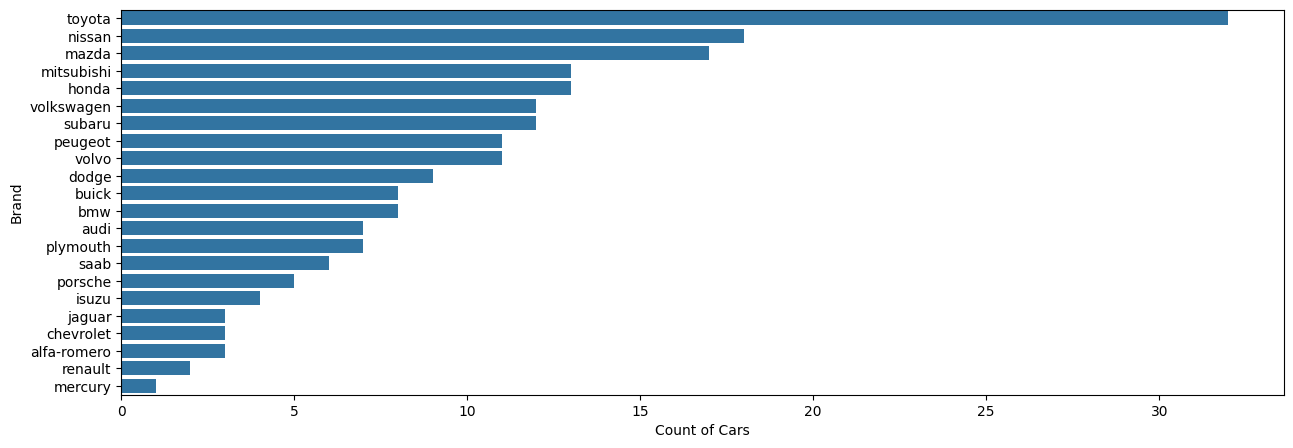

<Figure size 640x480 with 0 Axes>

In [19]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(data['brand'], order=pd.value_counts(data['brand']).index,)
plt1.set(ylabel = 'Brand', xlabel= 'Count of Cars')
plt.show()
plt.tight_layout()

We can drop 'car_ID', 'symboling', and 'CarName' from our data frame, since they will no longer be needed.


In [20]:
data.drop(['car_ID', 'symboling', 'CarName'],axis = 1, inplace = True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [22]:
#If you need to save this partially processed data, uncomment the line below.
data.to_csv('cleaned_car_data.csv', index=False)

## Exercise 1
In this exercise, explore any (or all) object variables of your interest.


In [26]:
# Enter your code and run the cell
data.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'brand'],
      dtype='object')

In [35]:
data["fueltype"].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [38]:
data["aspiration"].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [39]:
data["doornumber"].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python
data.fueltype.unique()
data["enginelocation"].value_counts()
```
</details>


Next, we need to engineer some features, for better visualizations and analysis. We will group our data by 'brand', calculate the average price for each brand, and split these prices into 3 bins: 'Budget', 'Mid-Range', and 'Luxury' cars, naming the newly created column - the 'brand_category'. 


In [52]:
import os
os.chdir("/Users/alecmitchell-thomson/Desktop/Coding/IBM-Machine-Learning-course/2-Supervised-Machine-Learning:Regression")

In [56]:
data = pd.read_csv("cleaned_car_data.csv")

data_comp_avg_price = data[['brand','price']].groupby('brand', as_index = False).mean().rename(columns={'price':'brand_avg_price'})
data_comp_avg_price

,brand,brand_avg_price
0,alfa-romero,15498.333333
1,audi,17859.166714
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000
5,dodge,7875.444444
6,honda,8184.692308
7,isuzu,8916.500000
8,jaguar,34600.000000
9,mazda,10652.882353


In [57]:
data = data.merge(data_comp_avg_price, on="brand")
data

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,18063.181818
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,18063.181818
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,18063.181818
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,18063.181818


We will now check the statistics of our average car price per car brand.


In [58]:
data.brand_avg_price.describe()

count      205.000000
mean     13276.710571
std       7154.179185
min       6007.000000
25%       9239.769231
50%      10077.500000
75%      15489.090909
max      34600.000000
Name: brand_avg_price, dtype: float64

In [59]:
data['brand_category'] = data['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                            else ("Mid_Range" if 10000 <= x < 20000
                                                            else "Luxury")
                                                      )
data

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price,brand_category
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333,Mid_Range
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333,Mid_Range
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333,Mid_Range
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714,Mid_Range
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714,Mid_Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.15,9.5,114,5400,23,28,16845.0,volvo,18063.181818,Mid_Range
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,3.15,8.7,160,5300,19,25,19045.0,volvo,18063.181818,Mid_Range
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,2.87,8.8,134,5500,18,23,21485.0,volvo,18063.181818,Mid_Range
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.40,23.0,106,4800,26,27,22470.0,volvo,18063.181818,Mid_Range


In [60]:
data.brand_category.value_counts()

brand_category
Budget       95
Mid_Range    86
Luxury       24
Name: count, dtype: int64

## **Exploratory Data Analysis**

List of Categorical Variables:
- brand_category
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

We will use the `boxplot()` function on the above mentioned categorical variables, to display the mean, variance, and possible outliers, with respect to the price.


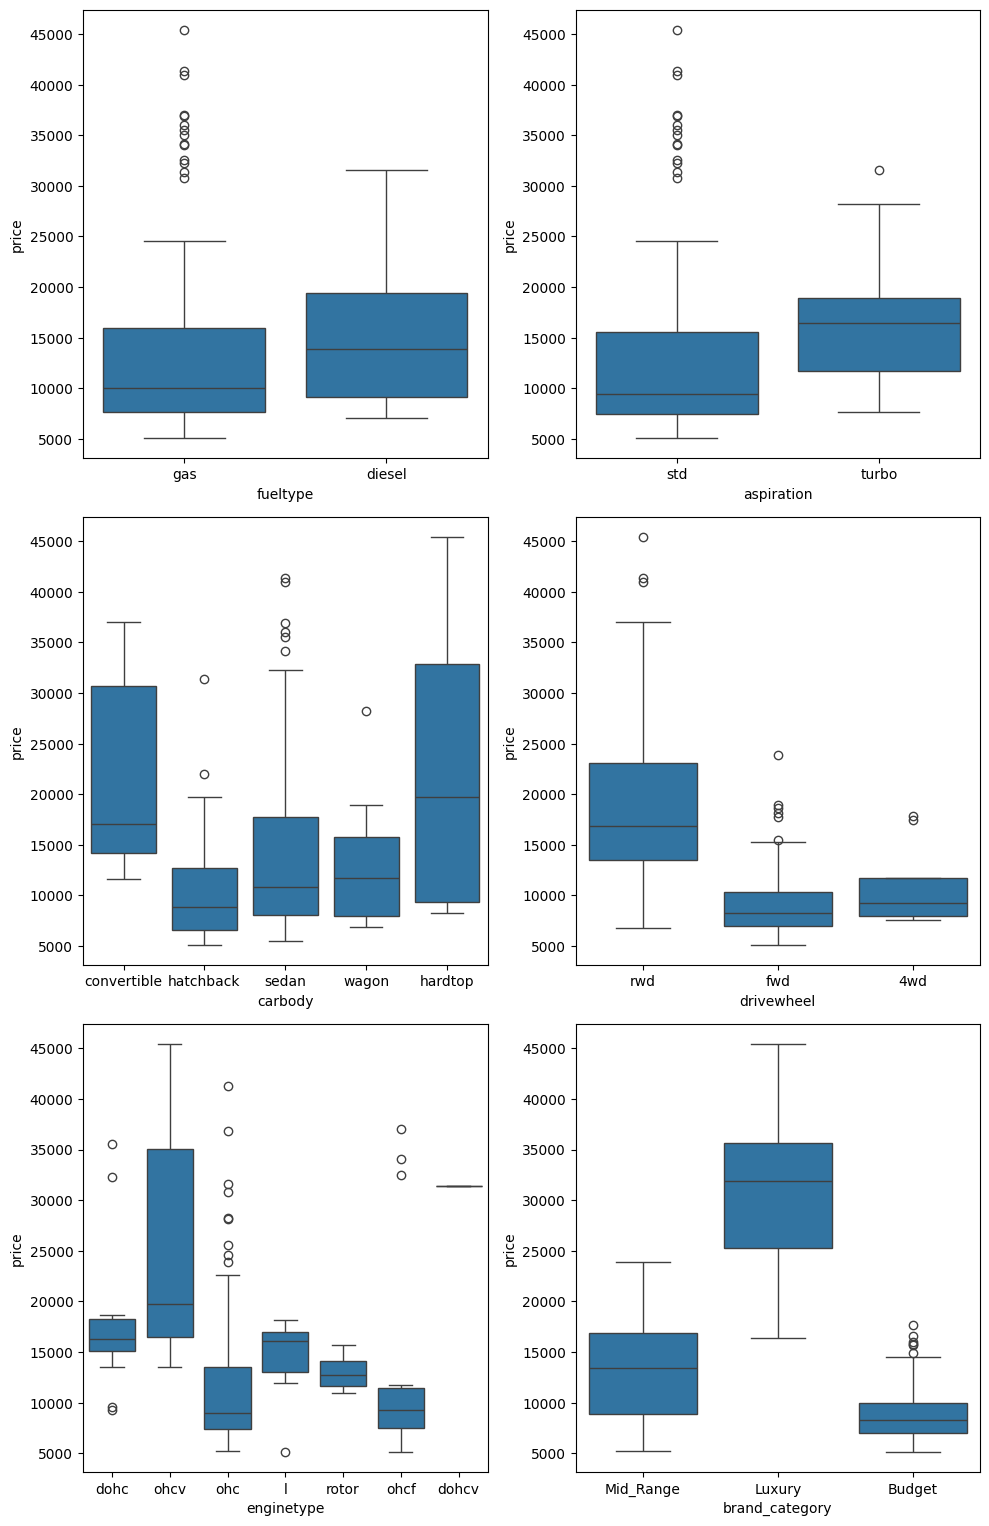

In [61]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = data)
plt.tight_layout()
plt.show()

Next, let's view the list of top features that have high correlation coefficient. The `corr()` function calculates the Pearson'r correlation coefficients with respect to the 'price'.


In [62]:
corr_matrix = data.corr(numeric_only=True)

corr_matrix['price'].sort_values(ascending=False)

price               1.000000
brand_avg_price     0.895520
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

These are strongly correlated numerical features with Car Price.


We can also use the `heatmap()` or `pairplot()` to further explore the relationship between all features and the target variables.


## Exercise 2 
Use the `pairplot()` function to display the scatter plots of the relationships between the features.


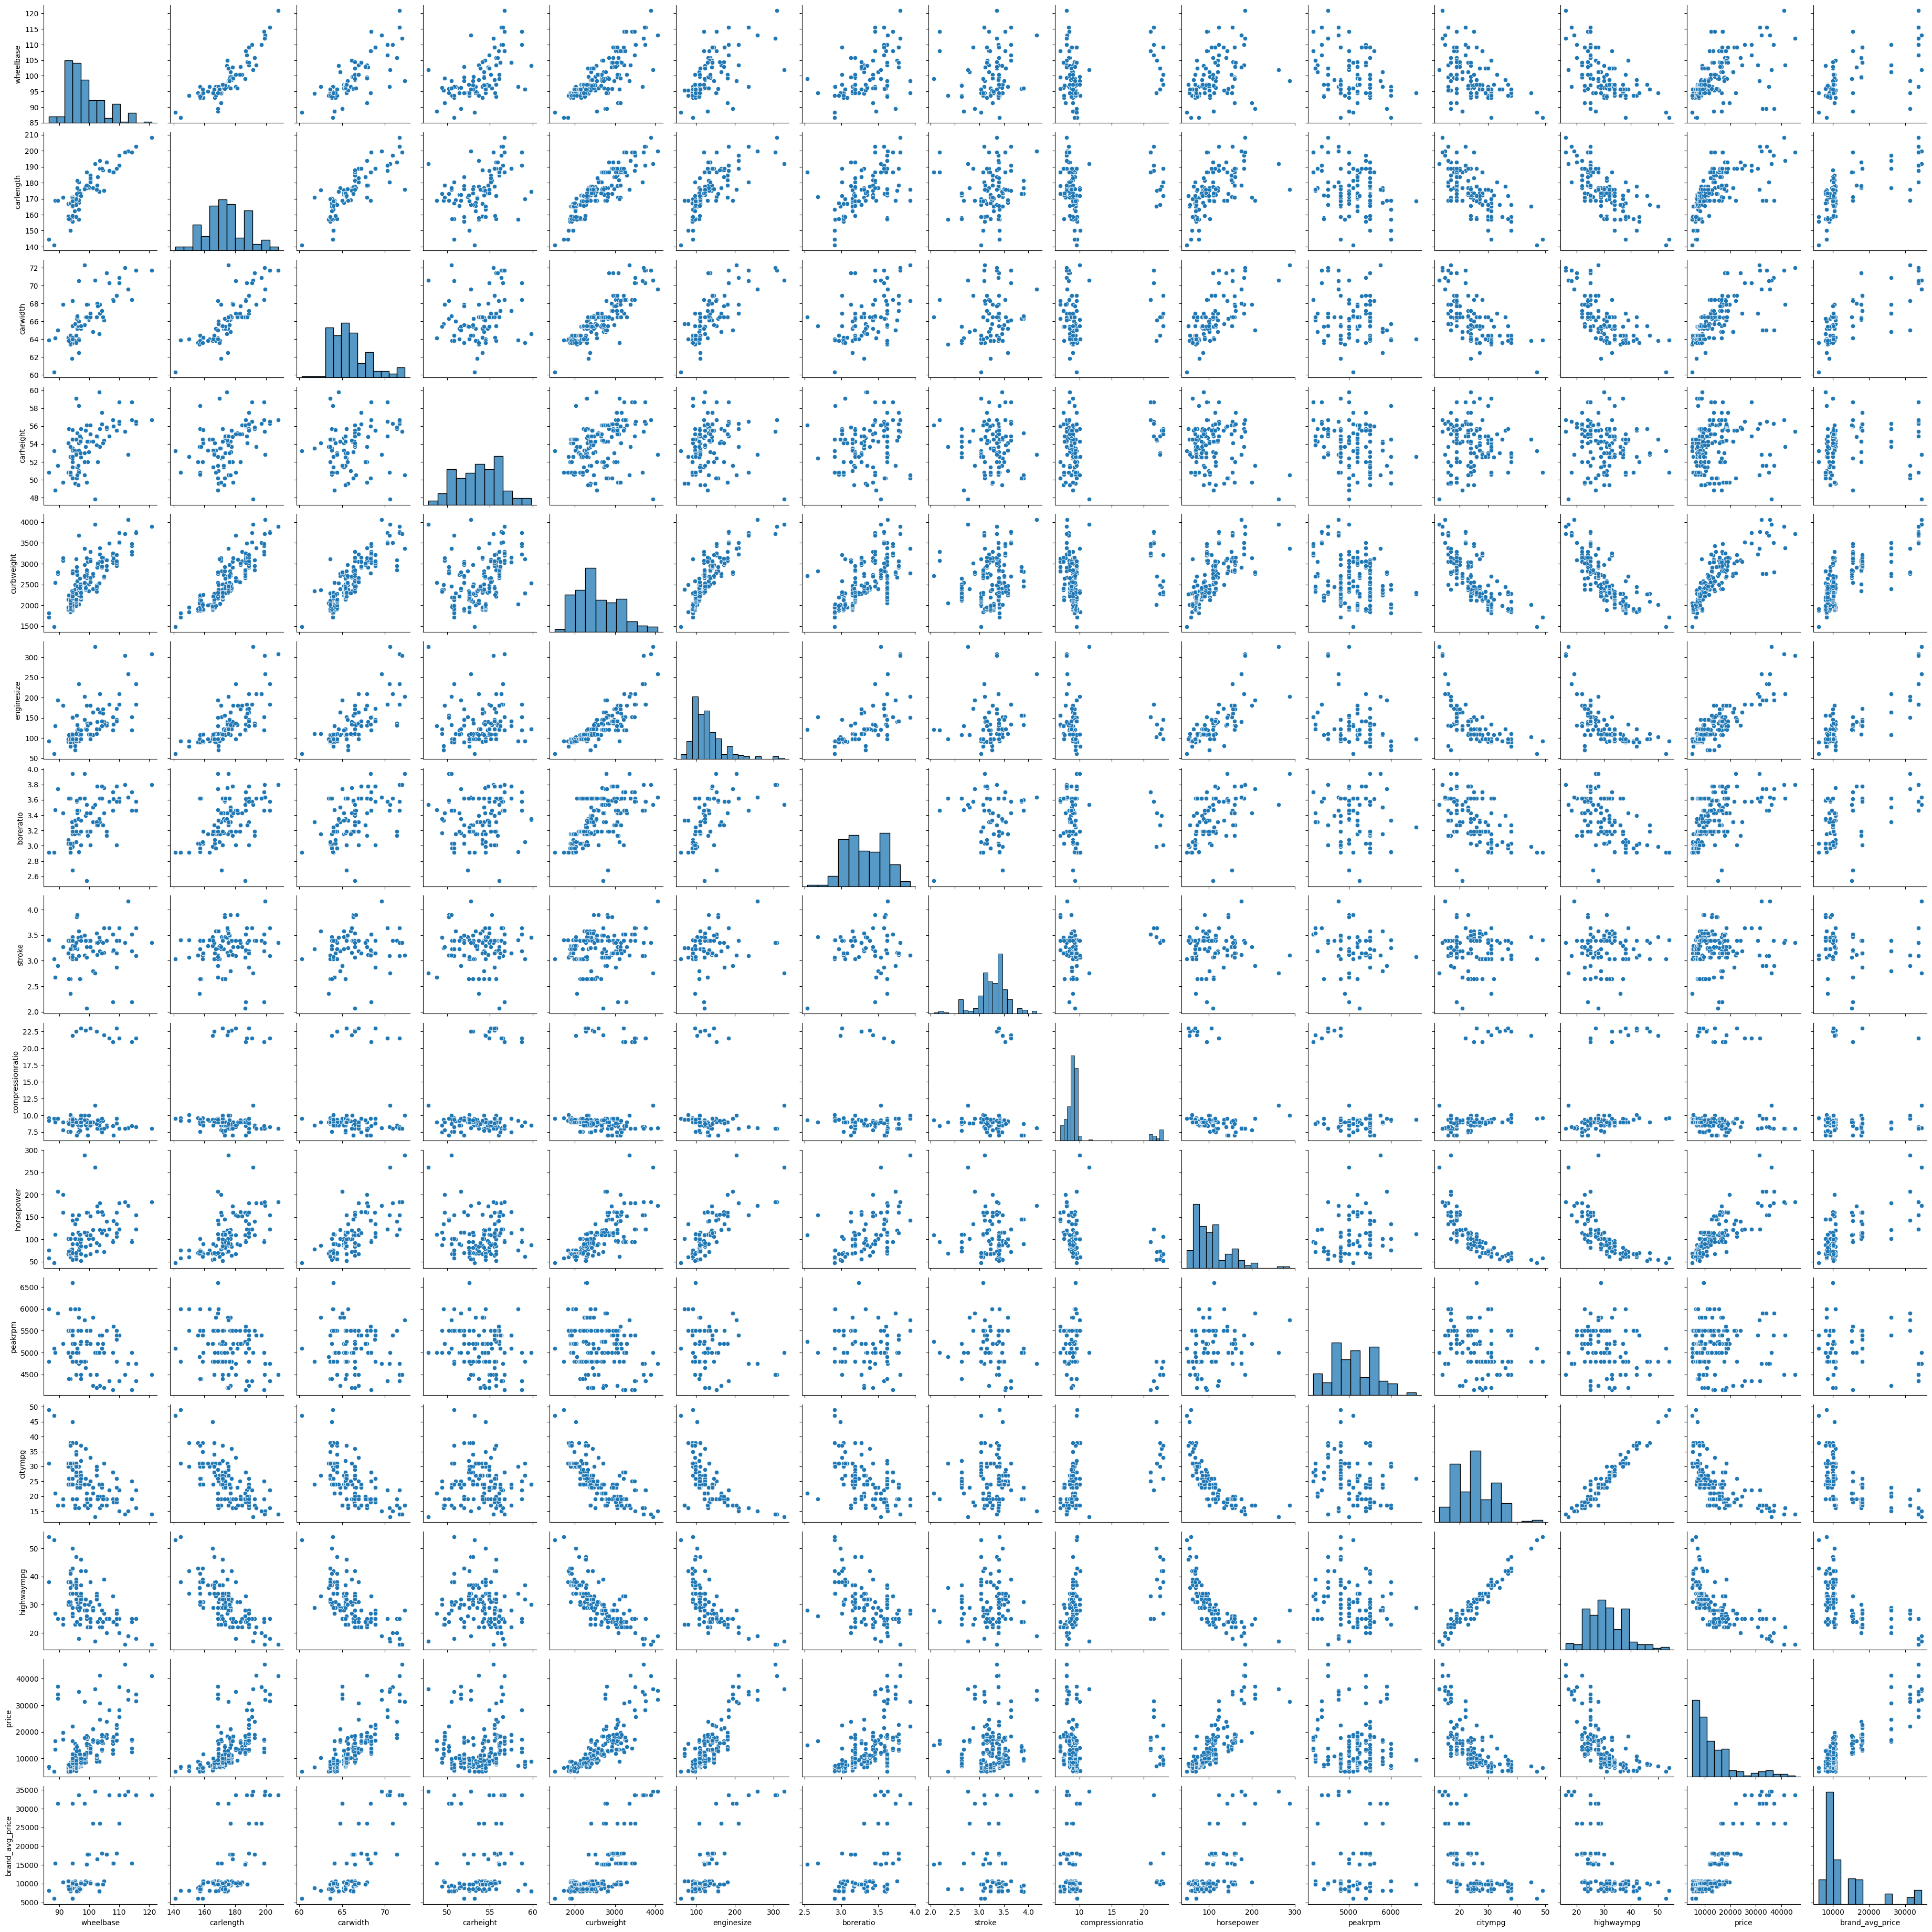

In [63]:
# Enter your code and run the cell
sns.pairplot(data)
plt.show()

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python


sns.pairplot(data)
plt.show()   
    
    
```
</details>


## **Testing Assumptions for Linear Regression**
Since we fit a linear model, we assume that the relationship between the target (price) and other features is linear. 

We also expect that the errors, or residuals, are pure random fluctuations around the true line, in other words, the variability in the response (dependent) variable doesn't increase as the value of the predictor (independent) variable increases. This is the assumption of equal variance, also known as *Homoscedasticity*. 

We also assume that the observations are independent of one another (no *multicollinearity*), and there is no correlation between the sequential observations.

If we see one of these assumptions in the dataset are not met, it's more likely that the other ones, mentioned above, will also be violated. Luckily, we can check and fix these assumptions with a few unique techniques.

Now, let's briefly touch upon each of these assumptions in our example.


### 1. Linearity Assumption

Linear regression needs the relationship between independent variable and the dependent variable to be linear. We can test this assumption with some scatter plots and regression lines. 

We will start with the 'enginesize' and 'horsepower' features.


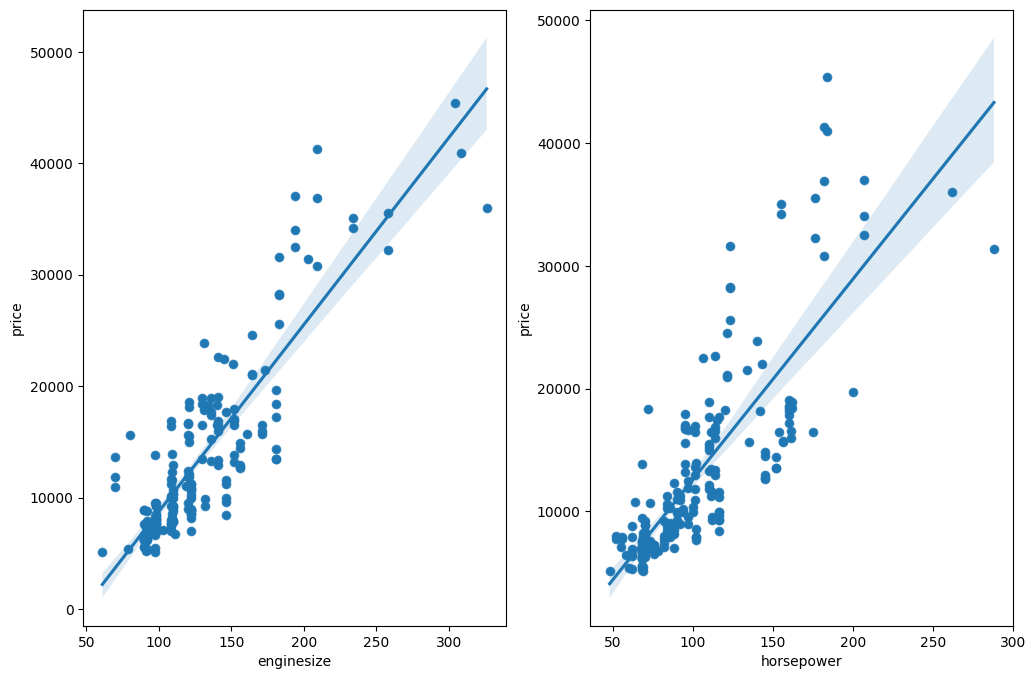

In [67]:
fig1, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.scatterplot( x = data.enginesize, y = data.price,  ax=ax1)
sns.regplot(x=data.enginesize, y=data.price, ax=ax1)
 
sns.scatterplot(x = data.horsepower,y = data.price, ax=ax2)
sns.regplot(x=data.horsepower, y=data.price, ax=ax2);


## Exercise 3
In this Exercise, plot any other numeric features, using the *seaborn* `regplot()` function, to see whether there is any linear relationship between the feature and the 'price'.


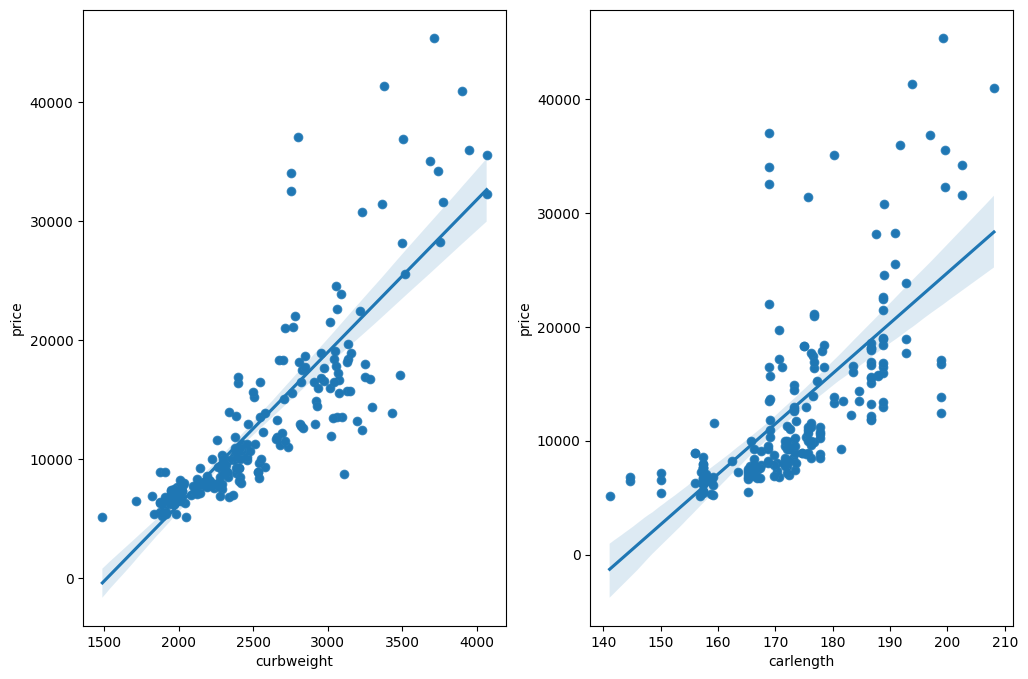

In [70]:
# Enter your code and run the cell
fig2, (ax3, ax4) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.scatterplot( x = data.curbweight, y = data.price,  ax=ax3)
sns.regplot(x=data.curbweight, y=data.price, ax=ax3)
 
sns.scatterplot(x = data.carlength,y = data.price, ax=ax4)
sns.regplot(x=data.carlength, y=data.price, ax=ax4);

In [ ]:
fig3, (ax5, ax6) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.scatterplot( x = data.highwaympg, y = data.price,  ax=ax5)
sns.regplot(x=data.highwaympg, y=data.price, ax=ax5)
 
sns.scatterplot(x = data.citympg,y = data.price, ax=ax6)
sns.regplot(x=data.highwaympg, y=data.price, ax=ax6);

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python
sns.regplot(x=data.curbweight, y=data.price, data=data)
    
```
</details>


### 2. *Homoscedasticity*

The assumption of *homoscedasticity* (constant variance), is crucial to linear regression models. *Homoscedasticity* describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable. In other words, there is a constant variance present in the response variable as the predictor variable increases. If the "noise" is not the same across the values of an independent variable, we call it *heteroscedasticity*, opposite of *homoscedasticity*. 


<Axes: xlabel='enginesize', ylabel='price'>

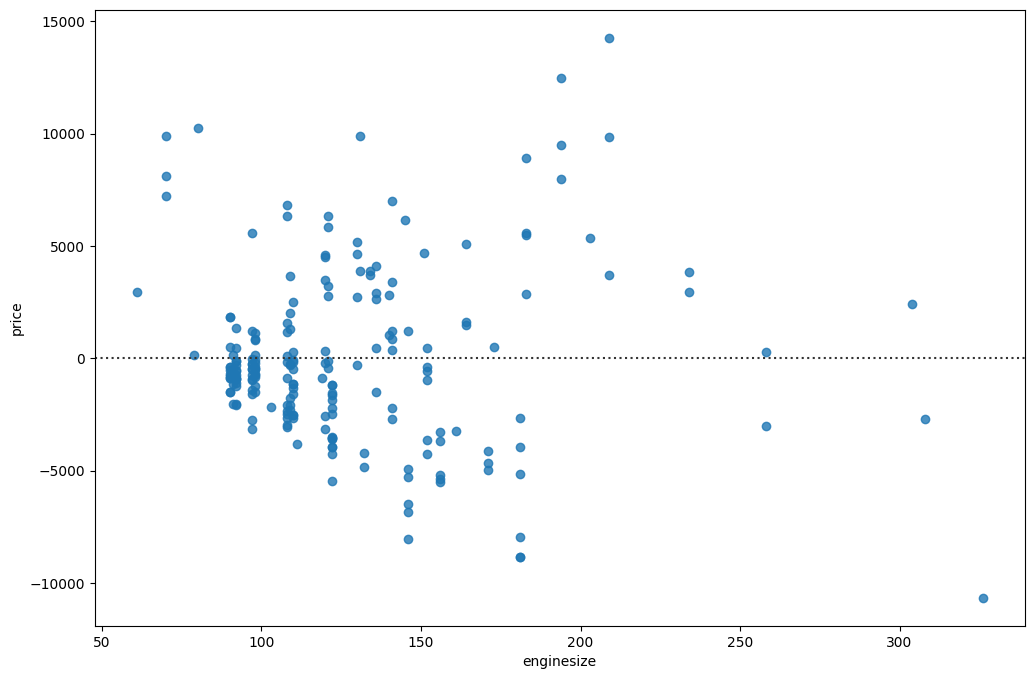

In [72]:
plt.subplots(figsize = (12,8))
sns.residplot(x=data.enginesize, y=data.price)

From the above plot, we can tell the error variance across the true line is dispersed somewhat not uniformly, but in a funnel like shape. So, the assumption of the *homoscedasticity* is more likely not met.


### 3. Normality
The linear regression analysis requires the dependent variable, 'price', to be normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. The goodness of fit test, e.g., the Kolmogorov-Smirnov test can check for normality in the dependent variable. [This documentation](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411) contains more information on the normality assumption. 

Let's display all three charts to show how our target variable, 'price' behaves.


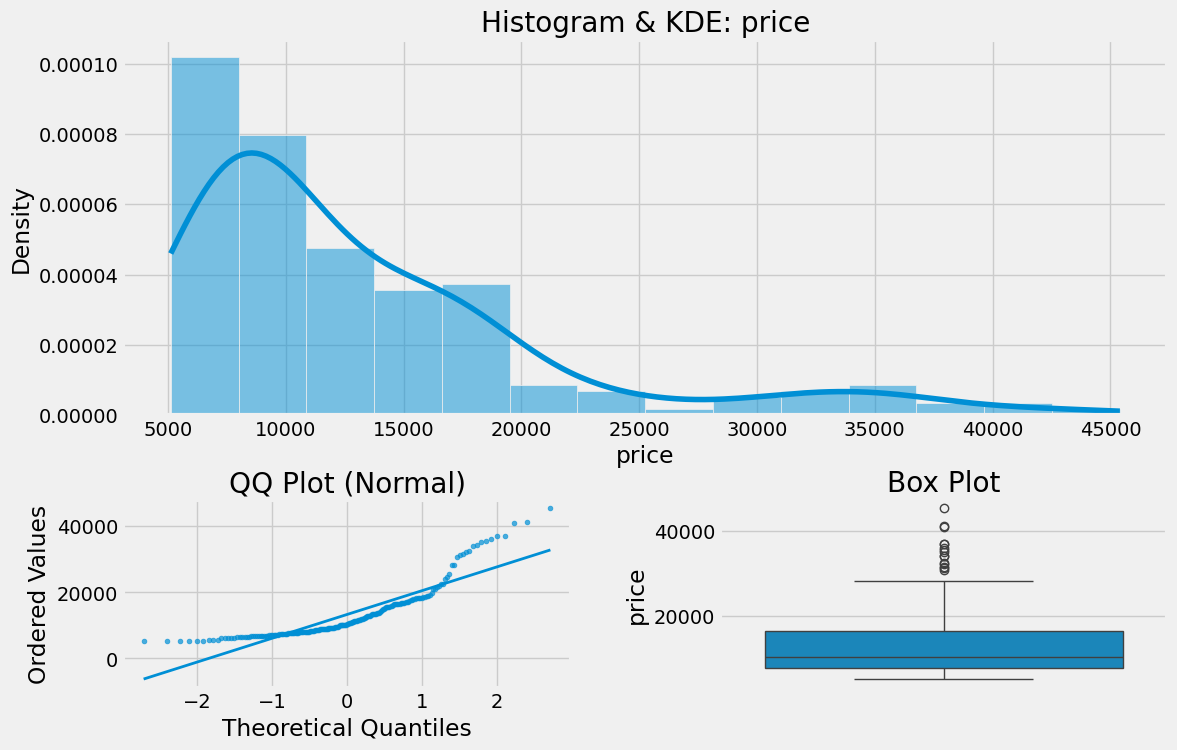

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def plotting_3_chart(data, feature):
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(2, 4, height_ratios=[2, 1], hspace=0.3, wspace=1)

    # Histogram + KDE (density-normalized)
    ax1 = fig.add_subplot(gs[0, :])
    sns.histplot(
        data=data,
        x=feature,
        stat="density",
        kde=True,
        ax=ax1
    )
    ax1.set_title(f"Histogram & KDE: {feature}")
    ax1.set_xlabel(feature)
    ax1.set_ylabel("Density")

    # QQ plot (against Normal)
    ax2 = fig.add_subplot(gs[1, :2])
    (osm, osr), (slope, intercept, r) = stats.probplot(
        data[feature].dropna(), dist="norm"
    )
    ax2.scatter(osm, osr, s=12, alpha=0.7)
    ax2.plot(osm, slope*np.array(osm) + intercept, lw=2)
    ax2.set_title("QQ Plot (Normal)")
    ax2.set_xlabel("Theoretical Quantiles")
    ax2.set_ylabel("Ordered Values")

    # Box plot
    ax3 = fig.add_subplot(gs[1, 2:])
    sns.boxplot(y=data[feature], ax=ax3)   # use keyword form
    ax3.set_title("Box Plot")
    ax3.set_xlabel("")
    ax3.set_ylabel(feature)

    plt.tight_layout()
    plt.show()
    
plotting_3_chart(data, 'price')

These three charts above can tell us a lot about our target variable:

- Our target variable, 'price' is not normally distributed
- Our target variable is right-skewed
- There are some outliers in the variable

The right-skewed plot means that most prices in the dataset are on the lower end (below 15,000). The 'max' value is very far from the '75%' quantile statistic. All these plots show that the assumption for accurate linear regression modeling is not met. 

Next, we will perform the log transformation to correct our target variable and to make it more normally distributed. 

But first, we will save our data that we have changed so far, in the 'previous_data' frame.


In [81]:
previous_data = data.copy()

### Log Transformation


We can also check statistically if the target is normally distributed, using `normaltest()` function. If the p-value is large (>0.05), the target variable is normally distributed.


In [82]:
normaltest(data.price.values)

NormaltestResult(statistic=np.float64(77.37514013383584), pvalue=np.float64(1.5783445016767577e-17))

As we can see, the p-value is very small, so it is not normally distributed.


Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` or `np.log1p`functions from the `numpy` library to perform the log transformation. The `np.log1p` works better with smaller numbers and thus provides more accurate results. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html) contains more information about the numpy log transform.


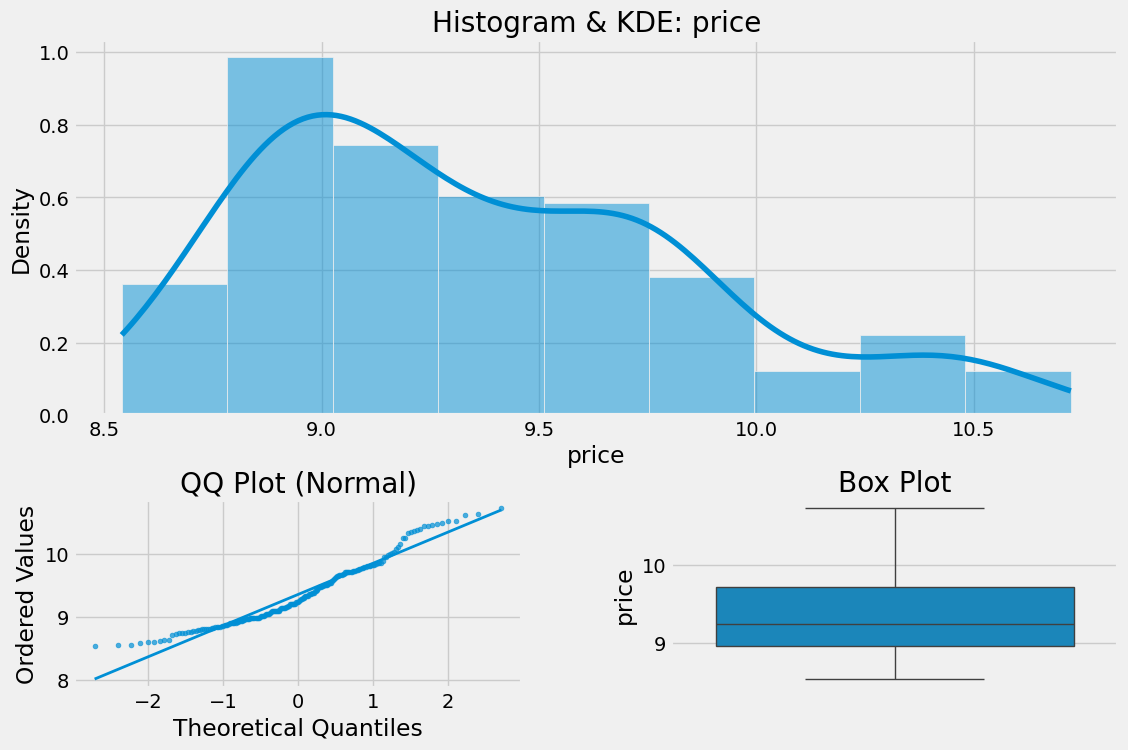

In [83]:
data['price'] = np.log(data['price'])
plotting_3_chart(data, 'price')

Let's check our p-value, after the transformation. 


In [84]:
normaltest(data.price.values)

NormaltestResult(statistic=np.float64(14.10341345775947), pvalue=np.float64(0.0008659297880185564))

As we can see, the log method transformed the car 'price' distribution into a more symmetrical bell curve. It is still not perfect, but it is much closer to being normally distributed.

There are other ways to correct the skewed data. For example, Square Root Transform (`np.sqrt`) and the Box-Cox Transform (`stats.boxcox` from the `scipy stats` library). To learn more about these two methods, please check out this [article](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45).


## Exercise 4 
Use the `boxcox()` function to do another transformation on the original, untransformed data (previous_data). Use the `normaltest()` function to check for statistics. 


In [88]:
previous_data

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price,brand_category
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333,Mid_Range
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333,Mid_Range
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333,Mid_Range
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714,Mid_Range
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714,Mid_Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.15,9.5,114,5400,23,28,16845.0,volvo,18063.181818,Mid_Range
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,3.15,8.7,160,5300,19,25,19045.0,volvo,18063.181818,Mid_Range
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,2.87,8.8,134,5500,18,23,21485.0,volvo,18063.181818,Mid_Range
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.40,23.0,106,4800,26,27,22470.0,volvo,18063.181818,Mid_Range


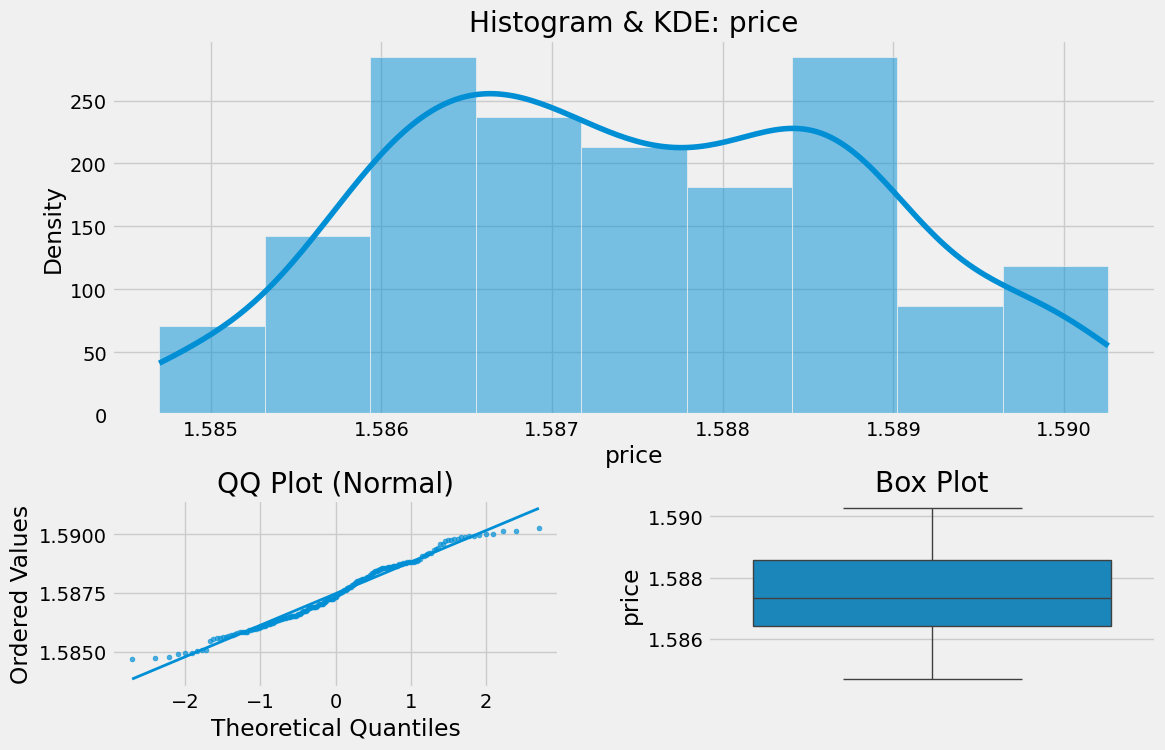

In [89]:
# Enter your code and run the cell
data["price"] = boxcox(previous_data["price"])[0]
plotting_3_chart(data, 'price')

In [90]:
normaltest(data.price.values)

NormaltestResult(statistic=np.float64(16.727142394114917), pvalue=np.float64(0.00023321000599424685))

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python
cp_result = boxcox(previous_data.price)
boxcox_price = cp_result[0]

    
normaltest(boxcox_price)
    
```
</details>


<details>
<summary><strong>Answer</strong> (Click Here)</summary>
```python
The higher the p-value is, the closer the distribution is to normal. In our case, pvalue=0.0.00023321005129893173, is very small, (<0.05), so the target variable is still not normally distributed).
    
```
</details>


### 4. *Multicollinearity*

*Multicollinearity* is when there is a strong correlation between the independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. *Multicollinearity* can lead to a variety of problems, including:
- The effect of predictor variables estimated by our regression will depend on what other variables are included in our model.
- Predictors can have widely different results depending on the observations in our sample, and small changes in samples can   result in very different estimated effects.
- With very high multicollinearity, the inverse matrix, the computer calculations may not be accurate.
- We can no longer interpret a coefficient on a variable because there is no scenario in which one variable can change without a conditional change in another variable.

Using `heatmap()` function is an excellent way to identify whether there is *multicollinearity* present or not. The best way to solve for *multicollinearity* is to use the regularization methods like *Ridge* or *Lasso*, which we will introduce in the **Regularization** lab.


## Exercise 5
Use the `heatmap()` do display all correlation factors of the numeric variables. Do you see any correlations between the independent features?


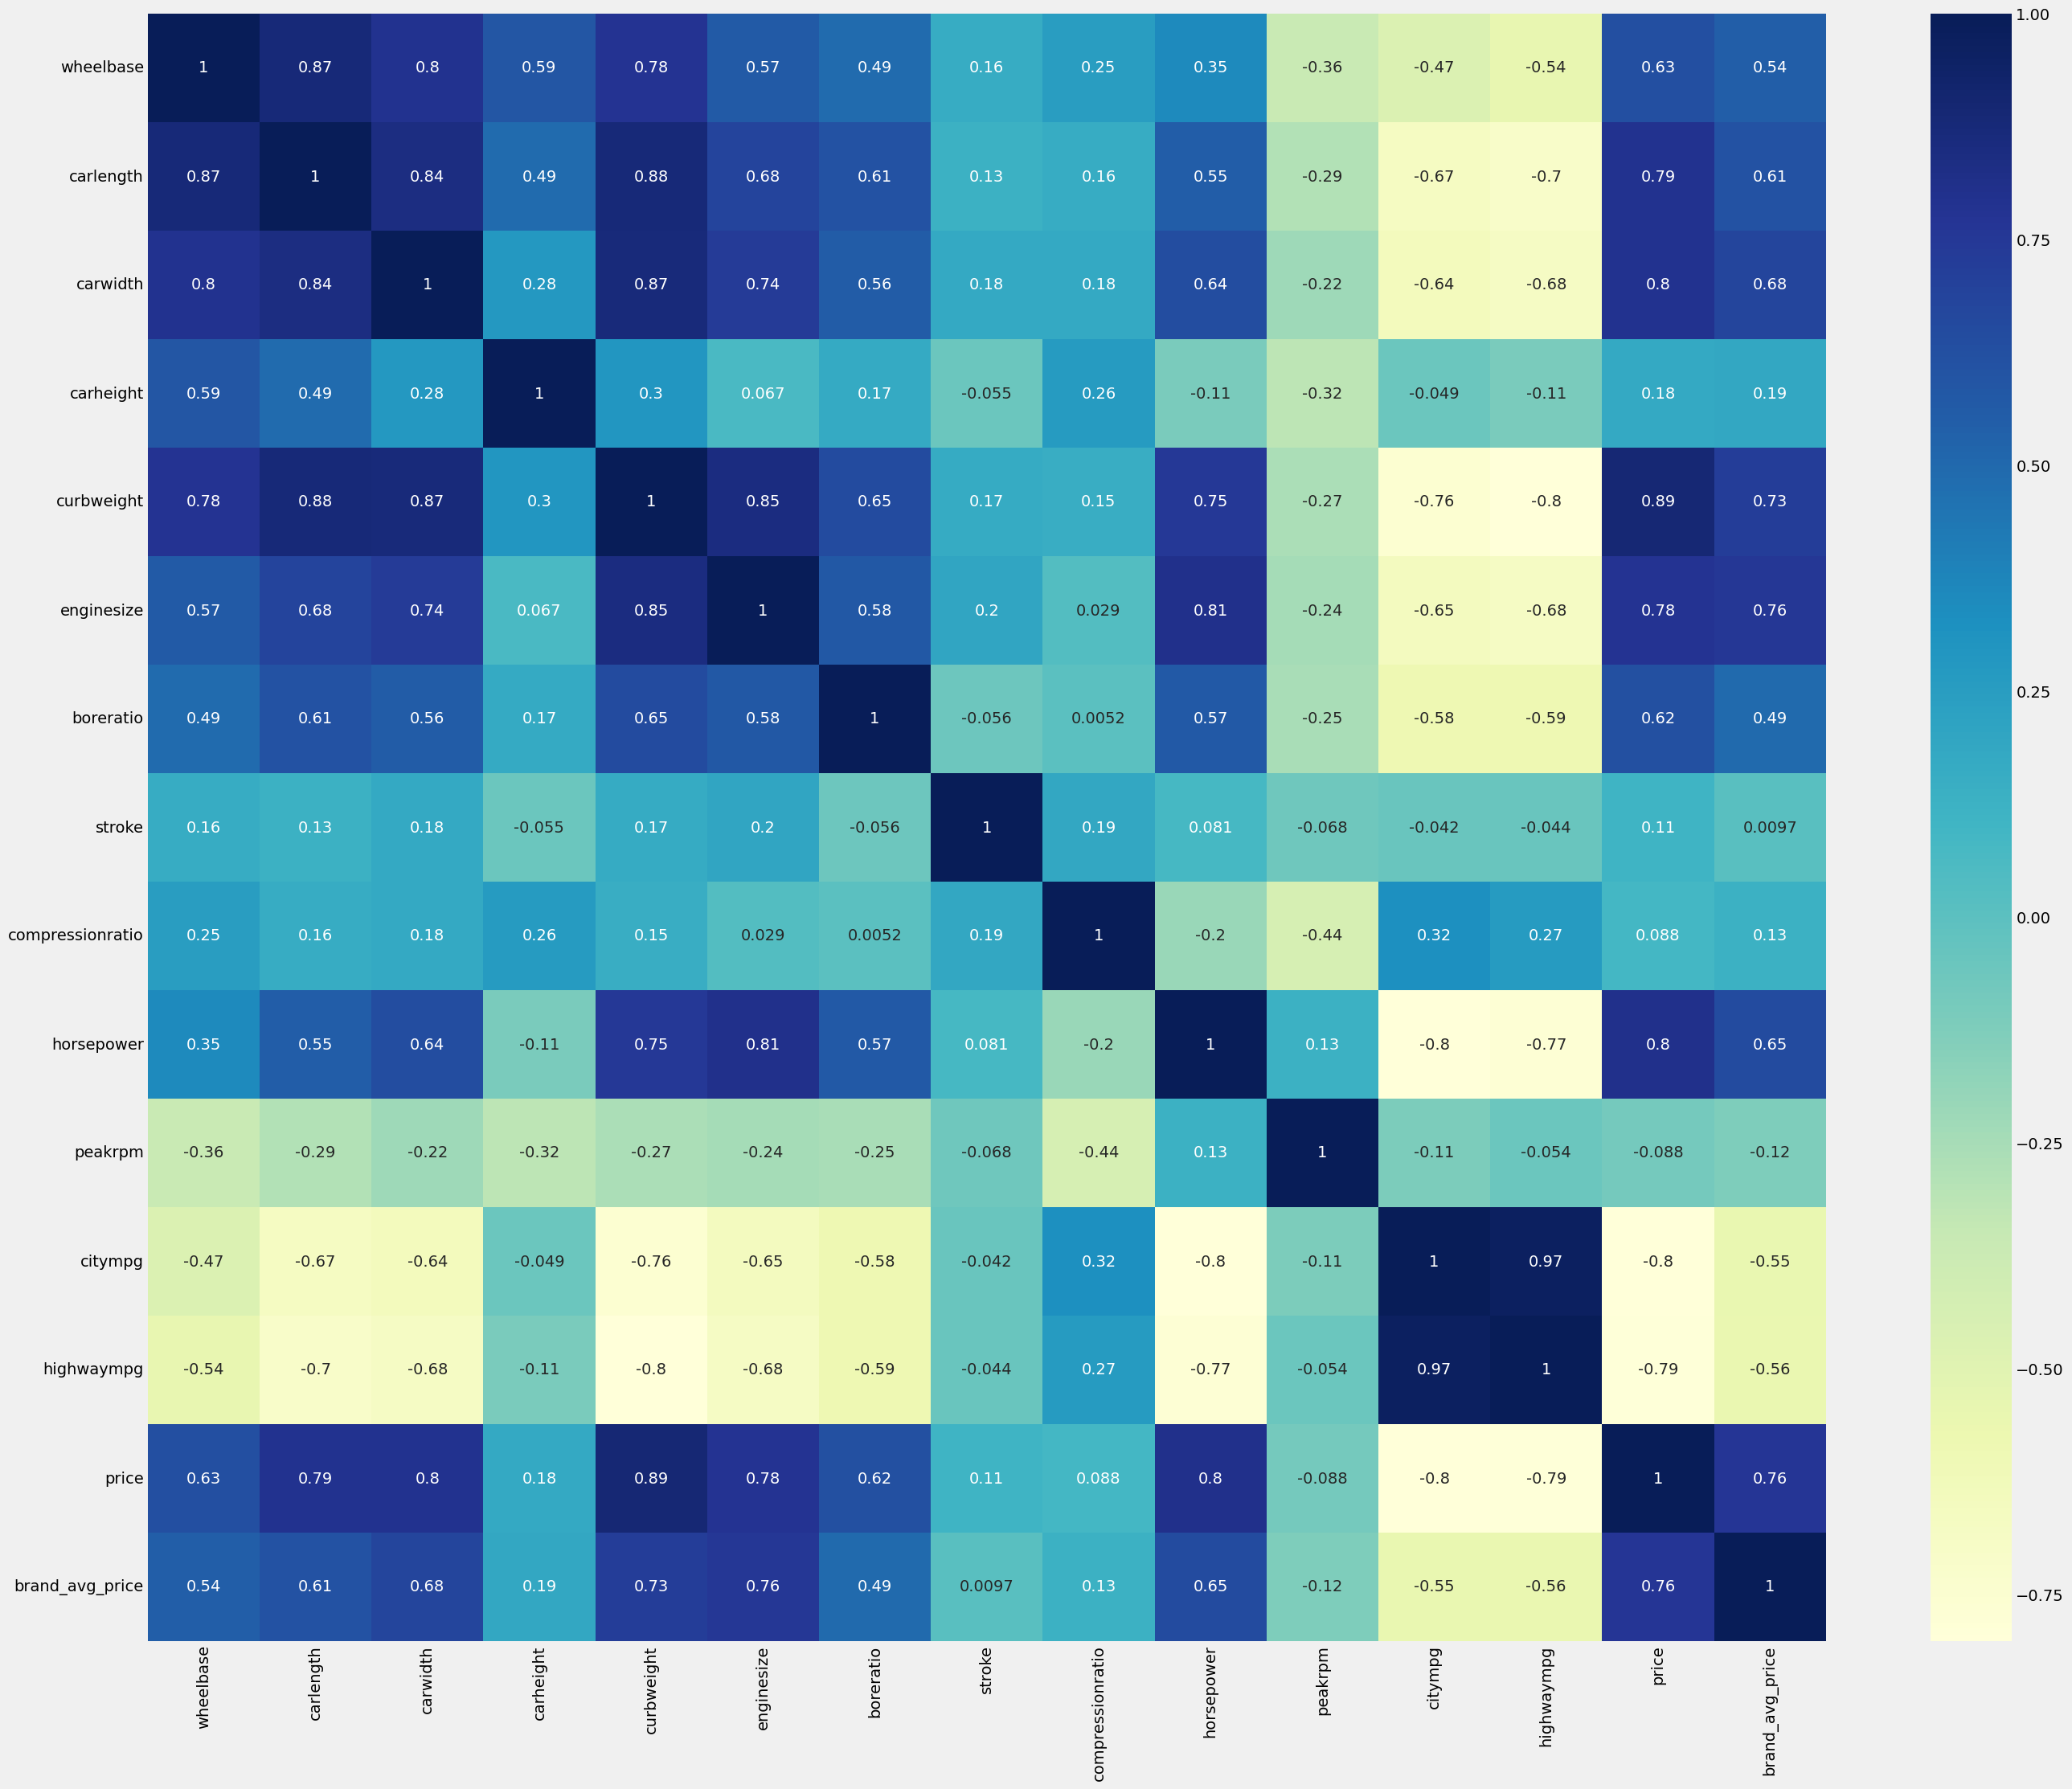

In [94]:
# Enter your code and run the cell
numeric_cols = data.select_dtypes(["int64", "float64"])

plt.figure(figsize = (30, 25))
sns.heatmap(numeric_cols.corr(), annot = True, cmap="YlGnBu")
plt.show()   

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

num = data.select_dtypes(include = ['int64', 'float64'])
plt.figure(figsize = (30, 25))
sns.heatmap(num.corr(), annot = True, cmap="YlGnBu")
plt.show()   
    
    
```
</details>


<details>
<summary><strong>Answer</strong> (Click Here)</summary>


Observation.
As we can see, the multicollinearity still exists in various features. However, we will keep them for now for the sake of learning and let the models (e.x. Regularization models such as Lasso, Ridge in the next lab) do the clean up later on.
    
    



## **Linear Regression Model**


List of significant variables after Exploratory Data Analysis :

Numerical:

- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- City mpg (miles per gallon)
- Highway mpg (miles per gallon)

Categorical:

- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Brand Category


We are going to put all the selected features into a data frame.


In [226]:
columns=['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand_category',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth','citympg','highwaympg']



selected = data[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   brand_category  205 non-null    object 
 7   curbweight      205 non-null    int64  
 8   enginetype      205 non-null    object 
 9   cylindernumber  205 non-null    object 
 10  enginesize      205 non-null    int64  
 11  boreratio       205 non-null    float64
 12  horsepower      205 non-null    int64  
 13  carlength       205 non-null    float64
 14  carwidth        205 non-null    float64
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
dtypes: float64(5), int64(5), object(7)


In [227]:
selected

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,brand_category,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,1.588097,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
1,1.588578,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
2,1.588578,gas,std,hatchback,rwd,94.5,Mid_Range,2823,ohcv,six,152,2.68,154,171.2,65.5,19,26
3,1.588181,gas,std,sedan,fwd,99.8,Mid_Range,2337,ohc,four,109,3.19,102,176.6,66.2,24,30
4,1.588702,gas,std,sedan,4wd,99.4,Mid_Range,2824,ohc,five,136,3.19,115,176.6,66.4,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.588624,gas,std,sedan,rwd,109.1,Mid_Range,2952,ohc,four,141,3.78,114,188.8,68.9,23,28
201,1.588886,gas,turbo,sedan,rwd,109.1,Mid_Range,3049,ohc,four,141,3.78,160,188.8,68.8,19,25
202,1.589124,gas,std,sedan,rwd,109.1,Mid_Range,3012,ohcv,six,173,3.58,134,188.8,68.9,18,23
203,1.589208,diesel,turbo,sedan,rwd,109.1,Mid_Range,3217,ohc,six,145,3.01,106,188.8,68.9,26,27


We can find the categorical columns by  iterating  through the ```dtypes```  attribute.


In [98]:
categorical_columns=[key for key, value in selected.dtypes.items()  if value=='O']
categorical_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'brand_category',
 'enginetype',
 'cylindernumber']

## Exercise 6 
Find the names of the  numeric columns using the list ```columns``` and assign them to the list  ```numeric_columns```.


In [ ]:
# Enter your code and run the cell
numeric_columns=list(set(columns)-set(categorical_columns))


['boreratio',
 'citympg',
 'price',
 'highwaympg',
 'wheelbase',
 'carlength',
 'curbweight',
 'horsepower',
 'carwidth',
 'enginesize']

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

numeric_columns=list(set(columns)-set(categorical_columns))
numeric_columns
    
```
</details>


We can split the data into the features ```X``` and target ```y```.


In [111]:
X = selected.drop("price", axis=1)
X.head()


,fueltype,aspiration,carbody,drivewheel,wheelbase,brand_category,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
1,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
2,gas,std,hatchback,rwd,94.5,Mid_Range,2823,ohcv,six,152,2.68,154,171.2,65.5,19,26
3,gas,std,sedan,fwd,99.8,Mid_Range,2337,ohc,four,109,3.19,102,176.6,66.2,24,30
4,gas,std,sedan,4wd,99.4,Mid_Range,2824,ohc,five,136,3.19,115,176.6,66.4,18,22


In [102]:
y = selected["price"].copy()
y.head()

0    1.588097
1    1.588578
2    1.588578
3    1.588181
4    1.588702
Name: price, dtype: float64

Before we used one-hot encoding to deal with the categorical data, let's examine the distribution of the categorical variables:


In [107]:
for column in categorical_columns:
    print("-----------------------")
    print( X[column].value_counts())

-----------------------
fueltype
gas       185
diesel     20
Name: count, dtype: int64
-----------------------
aspiration
std      168
turbo     37
Name: count, dtype: int64
-----------------------
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
-----------------------
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
-----------------------
brand_category
Budget       95
Mid_Range    86
Luxury       24
Name: count, dtype: int64
-----------------------
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
-----------------------
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


We see many categorical features have few or one occurrence. For example, we see ```three```, ```twelve``` only occur once in the column ```cylindernumber```. Therefore, if the components for the one-hot encoding are constructed using the training data, and the sample in the column ```cylindernumber``` does not include three or twelve, we will get an error. As a result, we must split the data before the transformation.   This is fine as one-hot encoding is a deterministic transform, but for other transforms, for example standardization, the parameters should be estimated using the training data, then applied to the test data.


## OneHotEncoder


We will use the following modules:


In [108]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

To perform one-hot encoding, we use the ```ColumnTransformer``` class, this allows different columns or column subsets to be transformed separately. 

The input is as follows:

The `transformerslist` is the number of tuples.
The list of `(name, transformer, columns)` tuples specify the transformer objects to be applied to the subsets of the data.

*   name: name of the operation that can be used later 
*  `transformer`: estimator must support fit and transform, in this case we will use `OneHotEncoder()`
*  `‘drop’`: to  drop the columns 
*  `‘passthrough’`: to pass them through untransformed data
*  `remainder`: specifies the columns that are not transformed are being set to `passthrough`. They are  combined in the output, and the non-specified columns are dropped.


We apply ```fit_transform()``` to transform the data.


In [ ]:
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), categorical_columns)],remainder="passthrough")
X=one_hot.fit_transform(X)
type(X)
X

array([[ 0. ,  1. ,  1. , ..., 64.1, 21. , 27. ],
       [ 0. ,  1. ,  1. , ..., 64.1, 21. , 27. ],
       [ 0. ,  1. ,  1. , ..., 65.5, 19. , 26. ],
       ...,
       [ 0. ,  1. ,  1. , ..., 68.9, 18. , 23. ],
       [ 1. ,  0. ,  0. , ..., 68.9, 26. , 27. ],
       [ 0. ,  1. ,  0. , ..., 68.9, 19. , 25. ]], shape=(205, 38))

We see the output is a NumPy array, so let's get the feature names from the ```one_hot``` object using  ```get_feature_names_out()``` method. The output  will be the feature name with the  prefix of the name of the transformer. For one-hot encoding, the prefix will also include the name of the column that generated that feature. 


In [113]:
names=one_hot.get_feature_names_out()
names

array(['one_hot__fueltype_diesel', 'one_hot__fueltype_gas',
       'one_hot__aspiration_std', 'one_hot__aspiration_turbo',
       'one_hot__carbody_convertible', 'one_hot__carbody_hardtop',
       'one_hot__carbody_hatchback', 'one_hot__carbody_sedan',
       'one_hot__carbody_wagon', 'one_hot__drivewheel_4wd',
       'one_hot__drivewheel_fwd', 'one_hot__drivewheel_rwd',
       'one_hot__brand_category_Budget', 'one_hot__brand_category_Luxury',
       'one_hot__brand_category_Mid_Range', 'one_hot__enginetype_dohc',
       'one_hot__enginetype_dohcv', 'one_hot__enginetype_l',
       'one_hot__enginetype_ohc', 'one_hot__enginetype_ohcf',
       'one_hot__enginetype_ohcv', 'one_hot__enginetype_rotor',
       'one_hot__cylindernumber_eight', 'one_hot__cylindernumber_five',
       'one_hot__cylindernumber_four', 'one_hot__cylindernumber_six',
       'one_hot__cylindernumber_three', 'one_hot__cylindernumber_twelve',
       'one_hot__cylindernumber_two', 'remainder__wheelbase',
       'remain

Let's strip out the prefix of the string. 


In [114]:
colunm_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
colunm_names

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'category_Budget',
 'category_Luxury',
 'category_Mid_Range',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

We can save the result as a dataframe to be used in other labs. 


In [116]:
df=pd.DataFrame(data=X,columns=colunm_names)
df.to_csv('cleaned_car_data.csv', index=False)
df

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,two,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,109.1,2952.0,141.0,3.78,114.0,188.8,68.9,23.0,28.0
201,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,109.1,3049.0,141.0,3.78,160.0,188.8,68.8,19.0,25.0
202,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,109.1,3012.0,173.0,3.58,134.0,188.8,68.9,18.0,23.0
203,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,109.1,3217.0,145.0,3.01,106.0,188.8,68.9,26.0,27.0


## Exercise 7
Write the lines of code  that performs same task as  ``ColumnTransformer`` using ``OneHotEncoder()``.


In [ ]:
# Enter your code and run the cell
X = selected[categorical_columns + numeric_columns]
X_numeric = X[numeric_columns]

encoder = OneHotEncoder(sparse_output=False)
X_categorical = encoder.fit_transform(X[categorical_columns])
cat_feature_names = encoder.get_feature_names_out(categorical_columns)

X_categorical_onehot = pd.DataFrame(X_categorical, columns=cat_feature_names, index=X.index)
df = pd.concat([X_categorical_onehot, X_numeric], axis=1)
df

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,...,boreratio,citympg,price,highwaympg,wheelbase,carlength,curbweight,horsepower,carwidth,enginesize
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.47,21,1.588097,27,88.6,168.8,2548,111,64.1,130
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.47,21,1.588578,27,88.6,168.8,2548,111,64.1,130
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.68,19,1.588578,26,94.5,171.2,2823,154,65.5,152
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.19,24,1.588181,30,99.8,176.6,2337,102,66.2,109
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,3.19,18,1.588702,22,99.4,176.6,2824,115,66.4,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.78,23,1.588624,28,109.1,188.8,2952,114,68.9,141
201,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.78,19,1.588886,25,109.1,188.8,3049,160,68.8,141
202,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.58,18,1.589124,23,109.1,188.8,3012,134,68.9,173
203,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.01,26,1.589208,27,109.1,188.8,3217,106,68.9,145




<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

X_ = selected[categorical_columns+numeric_columns]


X_numeric=X_[numeric_columns].to_numpy()
X_categorical=OneHotEncoder().fit_transform(X_[categorical_columns]).toarray()
X_=np.concatenate((X_categorical,X_numeric), axis = 1)

```
</details>


## Exercise 8
Write the lines of code that performs same task as  ``ColumnTransformer`` using ``pd.get_dummies``.


In [171]:
# Enter your code and run the cell
def dummies(x,data):
    temp = pd.get_dummies(data[x], dtype=int)
    data = pd.concat([data, temp], axis = 1)
    data.drop([x], axis = 1, inplace = True)
    return data

X = selected[categorical_columns+numeric_columns]

for column in categorical_columns:
    print(pd.unique(data[column]))
    X = dummies(column,X)

X

['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['Mid_Range' 'Luxury' 'Budget']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


,boreratio,citympg,price,highwaympg,wheelbase,carlength,curbweight,horsepower,carwidth,enginesize,...,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two
0,3.47,21,1.588097,27,88.6,168.8,2548,111,64.1,130,...,0,0,0,0,0,1,0,0,0,0
1,3.47,21,1.588578,27,88.6,168.8,2548,111,64.1,130,...,0,0,0,0,0,1,0,0,0,0
2,2.68,19,1.588578,26,94.5,171.2,2823,154,65.5,152,...,0,1,0,0,0,0,1,0,0,0
3,3.19,24,1.588181,30,99.8,176.6,2337,102,66.2,109,...,0,0,0,0,0,1,0,0,0,0
4,3.19,18,1.588702,22,99.4,176.6,2824,115,66.4,136,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3.78,23,1.588624,28,109.1,188.8,2952,114,68.9,141,...,0,0,0,0,0,1,0,0,0,0
201,3.78,19,1.588886,25,109.1,188.8,3049,160,68.8,141,...,0,0,0,0,0,1,0,0,0,0
202,3.58,18,1.589124,23,109.1,188.8,3012,134,68.9,173,...,0,1,0,0,0,0,1,0,0,0
203,3.01,26,1.589208,27,109.1,188.8,3217,106,68.9,145,...,0,0,0,0,0,0,1,0,0,0


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

### Defining the map function
def dummies(x,data):
    temp = pd.get_dummies(data[x], drop_first = True)
    data = pd.concat([data, temp], axis = 1)
    data.drop([x], axis = 1, inplace = True)
    return data

X_ = selected[categorical_columns+numeric_columns]
N_column=0
for column in  categorical_columns:
    print(pd.unique(data[column]))
    X_ = dummies(column,X_)

```
</details>


### Train Test Split


In the following Module 2: Data Splits and Cross Validation section of the Course, we will learn more about train and test split of the data deeper. But for now, we use `train_test_split()` function from *sklearn.model_selection* library to split our data into training and testing sets, using 30% of the data for testing.


In [172]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=0)

### Standardize the Data


We standardize features by removing the mean and scaling to unit variance using ```StandardScaler```, we create a 
```StandardScaler``` object:


In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
ss=StandardScaler()
ss

,copy,True
,with_mean,True
,with_std,True


We `fit` our training data, then we `transform` it.


In [ ]:
X_train=ss.fit_transform(X_train)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.367315,0.367315,0.504367,-0.504367,-0.190347,-0.209274,-0.666667,1.021204,-0.379473,-0.190347,...,-0.725182,0.330772,-0.101581,0.402117,-0.400606,0.074531,-0.391236,-0.474581,-1.644505,-0.423962
1,-0.367315,0.367315,0.504367,-0.504367,-0.190347,-0.209274,-0.666667,1.021204,-0.379473,-0.190347,...,0.181824,0.163633,-0.567134,0.245006,-0.031842,0.274366,-0.319130,-0.527272,0.300206,-0.138661
2,-0.367315,0.367315,0.504367,-0.504367,-0.190347,-0.209274,1.500000,-0.979236,-0.379473,-0.190347,...,-0.044927,-1.340619,0.204399,-1.168995,-0.593005,-0.458364,-0.376055,-0.079404,-0.088736,-1.374968
3,-0.367315,0.367315,0.504367,-0.504367,-0.190347,-0.209274,-0.666667,1.021204,-0.379473,-0.190347,...,0.332992,-1.340619,0.466297,-1.326106,0.224689,0.599098,0.980677,1.264199,0.300206,1.264073
4,-0.367315,0.367315,0.504367,-0.504367,-0.190347,-0.209274,-0.666667,1.021204,-0.379473,-0.190347,...,0.030656,-0.003506,-0.662572,0.245006,-0.432672,-0.175264,-0.328617,-0.421891,-0.234589,-0.138661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2.722456,-2.722456,-1.982684,1.982684,-0.190347,-0.209274,-0.666667,1.021204,-0.379473,-0.190347,...,0.899871,-0.504924,1.477036,-0.854773,1.763878,1.365134,1.777638,0.500189,2.147683,1.311623
139,2.722456,-2.722456,-1.982684,1.982684,-0.190347,-0.209274,-0.666667,1.021204,-0.379473,-0.190347,...,-1.254269,1.333607,0.514569,1.187673,0.224689,0.474201,0.001553,-0.948794,0.494678,-0.733039
140,-0.367315,0.367315,-1.982684,1.982684,-0.190347,-0.209274,-0.666667,1.021204,-0.379473,-0.190347,...,1.013247,-1.173480,0.985689,-1.011884,1.443213,1.015422,1.047090,1.000747,1.175327,0.146641
141,-0.367315,0.367315,0.504367,-0.504367,-0.190347,-0.209274,-0.666667,1.021204,-0.379473,-0.190347,...,1.088831,-1.674898,1.755933,-1.797440,2.244874,2.089537,2.823176,1.896482,1.807358,3.094759


### Linear Regression


Finally, we apply the `LinearRegression()` model and `fit()` our ```X``` and ```y``` data.


In [180]:
lm = LinearRegression()
lm.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Making Prediction


We will select some random data and apply the `predict()` function.


In [181]:
X_test=ss.transform(X_test)
car_price_predictions = lm.predict(X_test)
car_price_predictions

array([1.58958057, 1.58958396, 1.58958386, 1.589579  , 1.58958234,
       1.58958279, 1.58957927, 1.58958131, 1.58958422, 1.58958036,
       1.58958476, 1.58958567, 1.5895827 , 1.5895844 , 1.58958186,
       1.58958234, 1.58958204, 1.58958449, 1.58958131, 1.58958032,
       1.58958233, 1.58958392, 1.5895823 , 1.58958291, 1.589584  ,
       1.58957896, 1.58958067, 1.58958413, 1.58958157, 1.58957939,
       1.58958136, 1.58958313, 1.58958488, 1.58958188, 1.58958061,
       1.58958617, 1.58958292, 1.58958437, 1.58958023, 1.58958632,
       1.58958186, 1.58958426, 1.58958583, 1.58958381, 1.58958281,
       1.58958113, 1.58958113, 1.58958378, 1.58958295, 1.58958165,
       1.58958508, 1.58958079, 1.58958141, 1.58958258, 1.5895841 ,
       1.58958441, 1.58958265, 1.58958441, 1.58958233, 1.5895801 ,
       1.58958032, 1.58958391])

### Model Evaluation 


Let's evaluate this model with some statistics. We will use *Scikit_Learn's* `mean_squared_error()` function for this evaluation. MSE measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual values using the test data. For more information on MSE, please visit this wikipedia [site](https://en.wikipedia.org/wiki/Mean_squared_error).


In [182]:
mse = mean_squared_error(y_test, car_price_predictions)
mse

6.4586660251125575e-06

Checking the R squared, the coefficient of determination, which is the proportion of the variation in the dependent variable that is predictable from the independent variables. The closer is R squared to 1, the better is the fit of the model.


The `score()` method returns the coefficient of determination of the prediction.


In [183]:
lm.score(X_test,y_test)

-2.4071245543931603

The `r2_score` method returns the same statistic, also known as the goodness of fit of the model.


In [184]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, car_price_predictions)

-1942974.2471531783

If the R squared is negative, it suggests the overfitting, when a statistical model fits exactly against its training data.


### Pipeline Object


We can also create a Pipeline object and apply a set of transforms sequentially. Then, we can apply linear regression.  Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use ```StandardScaler```as a step in our pipeline.


 We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [191]:
steps=[('scaler', StandardScaler()), ('lm',  LinearRegression())]

 We input the list as an argument to the pipeline constructor.


In [192]:
pipe = Pipeline(steps=steps)

 We ```fit``` the constructor.


In [193]:
pipe.fit(X_train,y_train)

,steps,"[('scaler', ...), ('lm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


We make a prediction and perform model evaluation.


In [198]:
car_price_predictions = pipe.predict(X_test)
mse = mean_squared_error(y_test, car_price_predictions)
rmse = np.sqrt(mse)
rmse
r2_score(y_test, car_price_predictions)

-2.4071245543884547

### Exercise 9 
Use the  ``ColumnTransformer`` in the pipeline, then train the model using <b>all</b> the data, make a prediction and calculate all the  metrics.


In [268]:
# Enter your code and run the cell
X = selected.drop(columns="price").copy()
y = selected["price"].copy()

num_cols = [key for key,value in X.dtypes.items() 
                if value.kind in ('i', 'f')]
cat_cols = [key for key,value in X.dtypes.items() 
                if value == 'O']

preproc = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", StandardScaler(), num_cols),
    ],
    remainder="drop"
)

pipe = Pipeline([
    ("preproc", preproc),
    ("lm", LinearRegression())
])

X_train, X_test, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)

pipe.fit(X_train, y_train_split)
y_pred = pipe.predict(X_test)

In [269]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_split, y_pred)
print(r2)

0.840626673736417


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

X = selected[categorical_columns+numeric_columns]
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), categorical_columns) ],remainder="passthrough")
steps=[('one_hot',one_hot), ('scaler', StandardScaler()), ('lm',  LinearRegression())]

pipe = Pipeline(steps=steps)
pipe.fit(X,y)
car_price_predictions=pipe.predict(X)
r2_score(car_price_predictions, y)

```
</details>


# Congratulations! - You have completed the lab


## Authors


[Svitlana Kramar](www.linkedin.com/in/svitlana-kramar)

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a>


<!--## Change Log
 -->
